<a href="https://colab.research.google.com/github/KhaledGhaleb/PatternRecognition/blob/main/Exam_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1

```
Databases Given:

A- Grimace-Faces database. Contains 18 persons, each has 20 images. Use first 15 for training and remaining 5 for testing.
```

First Git Grimace Faces zip from GitHub public repo, and and zip 

In [ ]:
import requests, zipfile, os, io, time
zip_file_url = 'https://raw.githubusercontent.com/KhaledGhaleb/CorelDataSet/cf67f850902629e8f8c312bc796306af9dab326a/grimace.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
path_to_dir =  os.getcwd();
z.extractall(path_to_dir)
PATH = os.path.join(path_to_dir, 'grimace')
print(PATH)

/content/grimace


Remove unwanted files "Thumbs.db"

In [ ]:
#remove Thumb.db files
import glob
files=glob.glob(PATH + '*/*/*.db', recursive=True)
print(files)
for filename in files:
    try:
      os.remove(filename)
    except:
      print("Error while deleting file ")

['/content/grimace/ste/Thumbs.db', '/content/grimace/mike/Thumbs.db', '/content/grimace/and/Thumbs.db', '/content/grimace/john/Thumbs.db', '/content/grimace/dah/Thumbs.db']


Load Dir
Split Images to Train and Test

In [ ]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
#import skimage
#import cv2
import matplotlib.image as mpimg

  

grimace_data= load_files(PATH)
print('Number of Images',len(grimace_data.target),', Number of Categories',len(grimace_data.target_names))
x_train,x_test,y_train,y_test=train_test_split(grimace_data.filenames,grimace_data.target,test_size=0.25)
print('Number of Train Images',len(x_train),', Number of Test Images',len(x_test))

x_train_data = []
for filename in x_train:
  img = mpimg.imread(filename)
  x_train_data.append(img)
x_train_data = np.array(x_train_data)

x_test_data = []
for filename in x_test:
  img = mpimg.imread(filename)
  x_test_data.append(img)
x_test_data = np.array(x_test_data)
print(x_test_data.shape)

Number of Images 360 , Number of Categories 18
Number of Train Images 270 , Number of Test Images 90
(90, 200, 180, 3)




---



#Q1-a 
```
1- For database-A: (20 marks)
(a)
(i) Extract indexed-color histogram features for each image using a LUT of your design with feature vector length of 128. Measure its effectiveness using KNN classifier with K=5.
(ii) Extract DCT2 feature vector for each image of length 144, Measure its effectiveness using KNN classifier with K=5.
(iii) Extract BoW-SIFT for each image (For the SIFT BoW, create a dictionary of size 128 from the training interest points data and produce BoW feature vector for each image in the training and test sets). Measure its effectiveness using KNN classifier with K=5.
(iv) Combine the features above (concatenate), then use PCA with 25 components and measure the effectiveness using KNN with K = 5. Discuss the results.
(v) Extract 2 deep feature vectors for each image using 2 pre-trained deep neural networks (e.g. AlexNet, GoogleNet, Vgg16, ResNet50, etc.). Explain any pre-processing you need to do to extract the features. measure the effectiveness using KNN with K = 5. Discuss the results.
```

#Q1-a-i (indexed-color histogram)

Prepare LUT using Kmean clustering with 128 cluster

In [ ]:
start_time_a_i = time.time()
#from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
NumClusters = 128 #Number of color clusters
kmeans = MiniBatchKMeans(NumClusters)
#kmeans = KMeans(n_clusters= NumClusters)

Dims = x_train_data.shape
print(Dims)
#data = china / 255.0 # use 0...1 scale
ColorIdx_train_data = x_train_data.reshape(Dims[0]*Dims[1]*Dims[2], Dims[3])
print(ColorIdx_train_data.shape)
kmeans.fit(ColorIdx_train_data)

(270, 200, 180, 3)
(9720000, 3)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=128, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Predict new  indexed train dataset after K-Mean LUT 

In [ ]:
print("Size of Kmaen Custer array is ",kmeans.cluster_centers_.shape)
ColorIdx_Train_Predicted = kmeans.predict(ColorIdx_train_data)
print(ColorIdx_Train_Predicted.shape)
ColorIdx_Train_Predicted = ColorIdx_Train_Predicted.reshape(Dims[0],Dims[1]*Dims[2])

Size of Kmaen Custer array is  (128, 3)
(9720000,)


Show the first train image after converting index value to RGB using the LUT ( kmeans.cluster_centers)

(36000, 3)


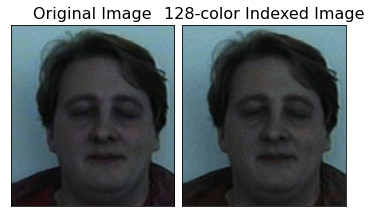

In [ ]:

new_colors = kmeans.cluster_centers_[ColorIdx_Train_Predicted[0,:]]/255.0
print(new_colors.shape)

fig, ax = plt.subplots(1, 2, subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(x_train_data[0])
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.reshape(Dims[1],Dims[2],Dims[3]))
ax[1].set_title( '128-color Indexed Image', size=16);

Get the Histogram features of Train Indexed Color with bins = 128 and range from 0 to 127 

In [ ]:
print(ColorIdx_Train_Predicted.shape)
ColorIdx_Train_Features = []
for colorIndx in ColorIdx_Train_Predicted:
  Train_F,_ = np.histogram( colorIndx,bins=128, range=(0, 127)   )
  #Train_F = np.bincount(colorIndx)
  ColorIdx_Train_Features.append(Train_F)
ColorIdx_Train_Features = np.array(ColorIdx_Train_Features)
print(ColorIdx_Train_Features.shape)


(270, 36000)
(270, 128)


Predict and get histogram for Test Data

In [ ]:

print(x_test_data.shape)
Dims = x_test_data.shape
#data = china / 255.0 # use 0...1 scale
ColorIdx_test_data = x_test_data.reshape(Dims[0]*Dims[1]*Dims[2], Dims[3])
print(ColorIdx_test_data.shape)

ColorIdx_Test_Predicted = kmeans.predict(ColorIdx_test_data)
ColorIdx_Test_Predicted = ColorIdx_Test_Predicted.reshape(Dims[0],Dims[1]*Dims[2])
print(ColorIdx_Test_Predicted.shape)
ColorIdx_Test_Features = []
for colorIndx in ColorIdx_Test_Predicted:
  Train_F,_ = np.histogram( colorIndx,bins=128, range=(0, 127)   )
  #Train_F = np.bincount(colorIndx)
  ColorIdx_Test_Features.append(Train_F)
ColorIdx_Test_Features = np.array(ColorIdx_Test_Features)
print(ColorIdx_Test_Features.shape)

(90, 200, 180, 3)
(3240000, 3)
(90, 36000)
(90, 128)


Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_color_indexed = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_color_indexed.fit(ColorIdx_Train_Features, y_train)
ColorIdx_y_test_pred = knn_color_indexed.predict(ColorIdx_Test_Features)

Find Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(ColorIdx_y_test_pred[1:10])
print(y_test[1:10])
print('Indexed Color Histogram Accuracy score: ',accuracy_score(ColorIdx_y_test_pred, y_test))
print('Indexed Color Histogram  F1 Score: ',f1_score(ColorIdx_y_test_pred, y_test, average="macro"))
elapsed_time_a_i = time.time()-start_time_a_i
print('Time elapsed: ', elapsed_time_a_i)

[ 0 12  2  3 17  5  2 17  2]
[ 0 12  2  3 17  5  2 17  2]
Indexed Color Histogram Accuracy score:  1.0
Indexed Color Histogram  F1 Score:  1.0
Time elapsed:  304.29512882232666


#Q1.a-ii (DCT2)

#Q1.a.ii (DCT2 rectange 8 * 6 * 3 = 144 With DC value)



In [ ]:
start_time_a_ii = time.time()
from scipy.fftpack import  dct
DCT2_TrainFeaturesArr = []
for image in x_train_data:
  DCT2_out = dct(image, 2) #DCT2 Features 
  DCT2_out = DCT2_out[:8,:6,:] 
  DCT2_out = DCT2_out.reshape((144))
  DCT2_TrainFeaturesArr.append(DCT2_out)
DCT2_TrainFeaturesArr = np.array(DCT2_TrainFeaturesArr)  
print(DCT2_TrainFeaturesArr.shape)

DCT2_ValidateFeaturesArr = []
for image in x_test_data:
  DCT2_out = dct(image, 2)
  DCT2_out = DCT2_out[:8,:6] 
  DCT2_out = DCT2_out.reshape((144))
  DCT2_ValidateFeaturesArr.append(DCT2_out)
DCT2_ValidateFeaturesArr = np.array(DCT2_ValidateFeaturesArr)
print(DCT2_ValidateFeaturesArr.shape)

(270, 144)
(90, 144)


Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_DCT2 = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_DCT2.fit(DCT2_TrainFeaturesArr, y_train)
y_pred_DCT2 = knn_DCT2.predict(DCT2_ValidateFeaturesArr)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(y_pred_DCT2[1:10])
print(y_test[1:10])
print('DCT2 KNN Accuracy score: ',accuracy_score(y_pred_DCT2, y_test))
print('DCT2 KNN F1 Score: ',f1_score(y_pred_DCT2, y_test, average="macro"))
elapsed_time_a_ii = time.time()-start_time_a_ii
print('Time elapsed: ', elapsed_time_a_ii)

[ 0 12  2  3 15  5  2  0  2]
[ 0 12  2  3 17  5  2 17  2]
DCT2 KNN Accuracy score:  0.8666666666666667
DCT2 KNN F1 Score:  0.8539264828738513
Time elapsed:  0.8852062225341797


#Q1.a.ii (DCT2 Square ((7 * 7)-1) * 3 = 144 Without DC) 
> Get DCT2 Features then take square of 7 * 7 then remove first point of DC level. such that each RGB has 48 Feature * 3 = 144 Features

In [ ]:
from scipy.fftpack import  dct
DCT2_TrainFeaturesArr = []
for image in x_train_data:
  DCT2_out = dct(image, 2) #DCT2 Features 
  DCT2_out = DCT2_out[:7,:7,:]
  DCT2_out = DCT2_out.reshape(49,3)
  DCT2_out = DCT2_out[1:49,:] # remove DC (0)
  DCT2_out = DCT2_out.reshape(144)
  DCT2_TrainFeaturesArr.append(DCT2_out)
DCT2_TrainFeaturesArr = np.array(DCT2_TrainFeaturesArr)  
print(DCT2_TrainFeaturesArr.shape)

DCT2_ValidateFeaturesArr = []
for image in x_test_data:
  DCT2_out = dct(image, 2) #DCT2 Features 
  DCT2_out = DCT2_out[:7,:7,:]
  DCT2_out = DCT2_out.reshape(49,3)
  DCT2_out = DCT2_out[1:49,:] # remove DC (0)
  DCT2_out = DCT2_out.reshape(144)
  DCT2_ValidateFeaturesArr.append(DCT2_out)
DCT2_ValidateFeaturesArr = np.array(DCT2_ValidateFeaturesArr)
print(DCT2_ValidateFeaturesArr.shape)

(270, 144)
(90, 144)


Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_DCT2 = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_DCT2.fit(DCT2_TrainFeaturesArr, y_train)
y_pred_DCT2 = knn_DCT2.predict(DCT2_ValidateFeaturesArr)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(y_pred_DCT2[1:10])
print(y_test[1:10])
print('DCT2 KNN Accuracy score: ',accuracy_score(y_pred_DCT2, y_test))
print('DCT2 KNN F1 Score: ',f1_score(y_pred_DCT2, y_test, average="macro"))

[ 0 12  2  3 15  5  2  0  2]
[ 0 12  2  3 17  5  2 17  2]
DCT2 KNN Accuracy score:  0.8777777777777778
DCT2 KNN F1 Score:  0.8588647544787896


#Q1.a.ii DCT2 Conclusion
> DCT2 Without DC point has a little better performance in accuracy

#Q1.a.iii (BoW-SIFT)

SIFT is not avaliable in latest opencv libraray. Use openCV version 3.4.2.17 to get SIFT.

In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0MB 115kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 103kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Get SIFT Descriptor for each image in gray scale

In [ ]:
start_time_a_iii = time.time()
import cv2
from sklearn.cluster import KMeans
#from sklearn.cluster import MiniBatchKMeans
NumClusters = 8 #Number of cluster using sift per image for lowest IMG SIFT features
#kmeans = MiniBatchKMeans(NumClusters)
kmeans = KMeans(n_clusters= NumClusters)

#BOW = cv2.BOWKMeansTrainer(dictionarySize) #Kmean with Dictionary size 128
sift = cv2.xfeatures2d.SIFT_create()

SIFT_Train_Features = []
for filename in x_train: 
  image = cv2.imread(filename)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, dsc= sift.detectAndCompute(gray, None)
  #kmean to 20 only descritors
  kmeans.fit(dsc)
  SIFT_IMG_Feature = kmeans.cluster_centers_
  SIFT_Train_Features.append(SIFT_IMG_Feature)
SIFT_Train_Features = np.array(SIFT_Train_Features)
print(SIFT_Train_Features.shape)
#reshape the BOW_Features 
SIFT_Train_Features = SIFT_Train_Features.reshape(SIFT_Train_Features.shape[0]*SIFT_Train_Features.shape[1],SIFT_Train_Features.shape[2])
print(SIFT_Train_Features.shape)

(270, 8, 128)
(2160, 128)


Create Dictionary of 128 size by using K-maen cluters

In [ ]:
dictionarySize = 128
kmeans = KMeans(n_clusters= dictionarySize)
kmeans.fit(SIFT_Train_Features)
Dict = kmeans.cluster_centers_
print(Dict.shape)


(128, 128)


Create Histogram for each blob in image by getting best euclidean distance  from Dictionary

In [ ]:
from scipy.spatial import distance
#Histogram for taining  images SIFT
BOW_Train_Features = []
for filename in x_train: 
  image = cv2.imread(filename)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, dsc= sift.detectAndCompute(gray, None)
  #get histogram for each blob
  Hist = np.zeros((dictionarySize,), dtype=int)
  for i in range(dsc.shape[0]):
    Dist_arr = []
    for ii in range(Dict.shape[0]):
      Dist = distance.euclidean(dsc[i],Dict[ii])
      #print(Dist)
      Dist_arr.append(Dist)
    Dist_arr = np.array(Dist_arr)
    #print(Dist_arr.shape)
    min_indx = np.argmin(Dist_arr, axis=0)
    Hist[min_indx] = Hist[min_indx] + 1
  #print(Hist)
  BOW_Train_Features.append(Hist)
BOW_Train_Features = np.array(BOW_Train_Features)
print(BOW_Train_Features.shape)


(270, 128)


Test BOW Features

In [ ]:
BOW_Test_Features = []
for filename in x_test: 
  image = cv2.imread(filename)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, dsc= sift.detectAndCompute(gray, None)
  #get histogram for each blob
  Hist = np.zeros((dictionarySize,), dtype=int)
  for i in range(dsc.shape[0]):
    Dist_arr = []
    for ii in range(Dict.shape[0]):
      Dist = distance.euclidean(dsc[i],Dict[ii])
      #print(Dist)
      Dist_arr.append(Dist)
    Dist_arr = np.array(Dist_arr)
    #print(Dist_arr.shape)
    min_indx = np.argmin(Dist_arr, axis=0)
    Hist[min_indx] = Hist[min_indx] + 1
  #print(Hist)
  BOW_Test_Features.append(Hist)
BOW_Test_Features = np.array(BOW_Test_Features)
print(BOW_Test_Features.shape)

(90, 128)


Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_SIFT = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_SIFT.fit(BOW_Train_Features, y_train)
y_pred_SIFT_BOW = knn_SIFT.predict(BOW_Test_Features)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(y_pred_SIFT_BOW[1:10])
print(y_test[1:10])
print('SIFT BOW KNN Accuracy score: ',accuracy_score(y_pred_SIFT_BOW, y_test))
print('SIFT BOW F1 Score: ',f1_score(y_pred_SIFT_BOW, y_test, average="macro"))
elapsed_time_a_iii = time.time()-start_time_a_iii
print('Time elapsed: ', elapsed_time_a_iii)

[ 0 12  2  3 17  5  2 17  2]
[ 0 12  2  3 17  5  2 17  2]
SIFT BOW KNN Accuracy score:  0.9777777777777777
SIFT BOW F1 Score:  0.971604938271605
Time elapsed:  48.390838623046875


#Q1.a.iv (PCA)

concatenate Features

In [ ]:
start_time_a_iv = time.time()
print(ColorIdx_Train_Features.shape,DCT2_TrainFeaturesArr.shape,BOW_Train_Features.shape)
Concat_Train_Features = np.concatenate((ColorIdx_Train_Features,DCT2_TrainFeaturesArr,BOW_Train_Features),axis=1)
Concat_Test_Features = np.concatenate((ColorIdx_Test_Features,DCT2_ValidateFeaturesArr,BOW_Test_Features),axis=1)
print(Concat_Train_Features.shape,Concat_Test_Features.shape)

(270, 128) (270, 144) (270, 128)
(270, 400) (90, 400)


Get PCA with 25 component instead of 400 component

In [ ]:
from sklearn.decomposition import PCA
pca_features= PCA(n_components=25)
pca_features.fit(Concat_Train_Features)
PCA_Train_Features = pca_features.transform(Concat_Train_Features)
PCA_Test_Features = pca_features.transform(Concat_Test_Features)
print(PCA_Train_Features.shape,PCA_Test_Features.shape)
pca_features

(270, 25) (90, 25)


PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_PCA = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_PCA.fit(PCA_Train_Features, y_train)
y_pred_PCA = knn_PCA.predict(PCA_Test_Features)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(y_pred_PCA[1:10])
print(y_test[1:10])
print('PCA KNN Train Accuracy score: ',accuracy_score(knn_PCA.predict(PCA_Train_Features), y_train))
print('PCA KNN Test Accuracy score: ',accuracy_score(y_pred_PCA, y_test))
print('PCA KNN Test F1 Score: ',f1_score(y_pred_PCA, y_test, average="macro"))
elapsed_time_a_iv = time.time()-start_time_a_iv
print('Time elapsed: ', elapsed_time_a_iv)

[ 0 12  2  3 17  5  2 17  2]
[ 0 12  2  3 17  5  2 17  2]
PCA KNN Train Accuracy score:  1.0
PCA KNN Test Accuracy score:  1.0
PCA KNN Test F1 Score:  1.0
Time elapsed:  0.19034910202026367


#Q1.a.iv (PCA Normalize the features STD standard deviation)

Normalize STD

In [ ]:
from sklearn.preprocessing import StandardScaler
Concat_Train_Features_Norm = StandardScaler().fit_transform(Concat_Train_Features) # normalizing the features
Concat_Test_Features_Norm = StandardScaler().fit_transform(Concat_Test_Features) # normalizing the features
print(np.mean(Concat_Train_Features),np.std(Concat_Train_Features))
print(np.mean(Concat_Train_Features_Norm),np.std(Concat_Train_Features_Norm))
print(Concat_Train_Features_Norm.shape,Concat_Test_Features_Norm.shape)

186.82250635568667 392.3187027958569
2.506636873375909e-17 0.9999999999999999
(270, 400) (90, 400)


Get PCA with 25 component instead of 400 component

In [ ]:
from sklearn.decomposition import PCA
pca_features= PCA(n_components=25)
pca_features.fit(Concat_Train_Features_Norm)
PCA_Train_Features_Norm = pca_features.transform(Concat_Train_Features_Norm)
PCA_Test_Features_Norm = pca_features.transform(Concat_Test_Features_Norm)
print(PCA_Train_Features_Norm.shape,PCA_Test_Features_Norm.shape)
pca_features

(270, 25) (90, 25)


PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_PCA = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_PCA.fit(PCA_Train_Features_Norm, y_train)
y_pred_PCA = knn_PCA.predict(PCA_Test_Features_Norm)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(y_pred_PCA[1:10])
print(y_test[1:10])
print('PCA KNN Train Accuracy score: ',accuracy_score(knn_PCA.predict(PCA_Train_Features_Norm), y_train))
print('PCA KNN Test Accuracy score: ',accuracy_score(y_pred_PCA, y_test))
print('PCA KNN Test F1 Score: ',f1_score(y_pred_PCA, y_test, average="macro"))

[ 0 12  2  3 17  5  2  0  2]
[ 0 12  2  3 17  5  2 17  2]
PCA KNN Train Accuracy score:  0.9925925925925926
PCA KNN Test Accuracy score:  0.9888888888888889
PCA KNN Test F1 Score:  0.9876543209876544


#Q1.a.v (2 pre-trained deep neural networks)

#Q1.a.v.1 (VGG16)


Get VGG16 model from Keras and adjust input shape to be the dimension of Grimace image. 

Add Max pool at the end of the model to get the 2 dimension array at the output

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
dim = x_train_data.shape
print(dim)
model_VGG16 = VGG16(weights='imagenet',include_top=False,input_shape= (dim[1],dim[2],dim[3]),pooling= 'max')
#model_VGG16.summary()

(270, 200, 180, 3)
58892288/58889256 [==============================] - 0s 0us/step


Create Feautre Arrays

Preprocess the data and  Predict the Train/Test Features using the above model

In [ ]:
start_time_a_v_1 = time.time()
x_train_Vgg16 = tf.keras.applications.vgg16.preprocess_input(x_train_data)
x_test_Vgg16 = tf.keras.applications.vgg16.preprocess_input(x_test_data)
TrainFeaturesArr_VGG16 = model_VGG16.predict(x_train_Vgg16)
TestFeaturesArr_VGG16 = model_VGG16.predict(x_test_Vgg16)
print(TrainFeaturesArr_VGG16.shape,TestFeaturesArr_VGG16.shape)

(270, 512) (90, 512)


Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_VGG16 = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_VGG16.fit(TrainFeaturesArr_VGG16, y_train)
y_pred_VGG16 = knn_VGG16.predict(TestFeaturesArr_VGG16)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('VGG16 Accuracy score: ',accuracy_score(y_pred_VGG16, y_test))
print('VGG16 F1 Score: ',f1_score(y_pred_VGG16, y_test, average="macro"))
elapsed_time_a_v_1 = time.time()-start_time_a_v_1
print('Time elapsed: ', elapsed_time_a_v_1)

VGG16 Accuracy score:  1.0
VGG16 F1 Score:  1.0
Time elapsed:  124.16817283630371


#Q1.a.v.2 (InceptionV3) "GoogleNet"

Get InceptionV3 model from Keras and adjust input shape to be the dimension of Grimace image. 

Add Max pool at the end of the model to get the 2 dimension array at the output

In [ ]:
from tensorflow.keras.applications.inception_v3  import InceptionV3
dim = x_train_data.shape
print(dim)
model_InceptionV3 = InceptionV3(weights='imagenet',include_top=False,input_shape= (dim[1],dim[2],dim[3]),pooling= 'max')
#model_InceptionV3.summary()

(270, 200, 180, 3)
87916544/87910968 [==============================] - 1s 0us/step


Create Feautre Arrays

Preprocess the data and  Predict the Train/Test Features using the above model

In [ ]:
start_time_a_v_2 = time.time()
x_train_InceptionV3 = tf.keras.applications.inception_v3.preprocess_input(x_train_data)
x_test_InceptionV3 = tf.keras.applications.inception_v3.preprocess_input(x_test_data)
TrainFeaturesArr_InceptionV3 = model_InceptionV3.predict(x_train_InceptionV3)
TestFeaturesArr_InceptionV3 = model_InceptionV3.predict(x_test_InceptionV3)
print(TrainFeaturesArr_InceptionV3.shape,TestFeaturesArr_InceptionV3.shape)

(270, 2048) (90, 2048)


Add KNN layer with K = 5 and P = 1 

In [ ]:
from sklearn import neighbors
knn_InceptionV3 = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn_InceptionV3.fit(TrainFeaturesArr_InceptionV3, y_train)
y_pred_InceptionV3 = knn_InceptionV3.predict(TestFeaturesArr_InceptionV3)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('InceptionV3 Test Accuracy score: ',accuracy_score(y_pred_InceptionV3, y_test))
print('InceptionV3 Test F1 Score: ',f1_score(y_pred_InceptionV3, y_test, average="macro"))
elapsed_time_a_v_2 = time.time()-start_time_a_v_2
print('Time elapsed: ', elapsed_time_a_v_2)

InceptionV3 Test Accuracy score:  0.9888888888888889
InceptionV3 Test F1 Score:  0.9887766554433222
Time elapsed:  24.697778463363647




---



#Q1.b
```
Using the PCA-reduced features you calculated as well as the 2 deep feature vector extractions:
Compare between the following classifiers: 
  (a) Shallow MLP 
  (b) SVM 
  (c) Bagging trees (random-forest) 
  (d) Logistic Regression and 
  (e) KNN
for each of the 3 feature vectors types you have.

Show the % recognition rate in each case (You have to run at least 3 experiments for each classifier with different configuration and justify your choices: 
So you need to have 9 experiments in total) Discuss the results and explain the advantages of the classifier/features that gave the best results). 
Would you suggest any other approach to obtain better results?
```

#Q1.b.a (Shallow MLP)

In [ ]:
print(PCA_Train_Features.shape,TrainFeaturesArr_VGG16.shape, TrainFeaturesArr_InceptionV3.shape)

(270, 25) (270, 512) (270, 2048)


Create a Shallow MLP with one hidden layer, with different configuration.
> Using different activation function for hidden layer Relu or sigmoid, Apply momentum or not, change number of Neurons


In [ ]:
from sklearn.neural_network import MLPClassifier

Shallow_MLP_PCA_1 = MLPClassifier(hidden_layer_sizes=(20,), max_iter=200, solver = 'sgd', momentum= 0 , activation = 'relu',verbose = False)
Shallow_MLP_PCA_2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, solver = 'sgd', momentum= 0 , activation = 'relu',verbose = False)
Shallow_MLP_PCA_3 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, solver = 'sgd', momentum= 0.1 , activation = 'relu',verbose = False)
Shallow_MLP_PCA_4 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, solver = 'sgd', momentum= 0 , activation = 'logistic',verbose = False) #sigmoid

Shallow_MLP_VGG16_1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, solver = 'sgd', momentum= 0 , activation = 'relu',verbose = False)
Shallow_MLP_VGG16_2 = MLPClassifier(hidden_layer_sizes=(200,), max_iter=200, solver = 'sgd', momentum= 0 , activation = 'relu',verbose = False)
Shallow_MLP_VGG16_3 = MLPClassifier(hidden_layer_sizes=(30,), max_iter=200, solver = 'adam', momentum= 0 , activation = 'relu',verbose = False)

Shallow_MLP_InceptionV3_1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, solver = 'adam', momentum= 0 , activation = 'relu',verbose = False)
Shallow_MLP_InceptionV3_2 = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, solver = 'adam', momentum= 0 , activation = 'relu',verbose = False )
Shallow_MLP_InceptionV3_3 = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, solver = 'adam', momentum= 0 , activation = 'relu',verbose = False , learning_rate_init=0.01 )

In [ ]:
Shallow_MLP_PCA_1.fit(PCA_Train_Features,y_train)
Shallow_MLP_PCA_2.fit(PCA_Train_Features,y_train)
Shallow_MLP_PCA_3.fit(PCA_Train_Features,y_train)
Shallow_MLP_PCA_4.fit(PCA_Train_Features,y_train)

Shallow_MLP_VGG16_1.fit(TrainFeaturesArr_VGG16,y_train)
Shallow_MLP_VGG16_2.fit(TrainFeaturesArr_VGG16,y_train)
Shallow_MLP_VGG16_3.fit(TrainFeaturesArr_VGG16,y_train)

Shallow_MLP_InceptionV3_1.fit(TrainFeaturesArr_InceptionV3,y_train)
Shallow_MLP_InceptionV3_2.fit(TrainFeaturesArr_InceptionV3,y_train)
Shallow_MLP_InceptionV3_3.fit(TrainFeaturesArr_InceptionV3,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500, momentum=0,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
y_pred_PCA_1 = Shallow_MLP_PCA_1.predict(PCA_Test_Features)
y_pred_PCA_2 = Shallow_MLP_PCA_2.predict(PCA_Test_Features)
y_pred_PCA_3 = Shallow_MLP_PCA_3.predict(PCA_Test_Features)
y_pred_PCA_4 = Shallow_MLP_PCA_4.predict(PCA_Test_Features)

y_pred_VGG16_1 = Shallow_MLP_VGG16_1.predict(TestFeaturesArr_VGG16)
y_pred_VGG16_2 = Shallow_MLP_VGG16_2.predict(TestFeaturesArr_VGG16)
y_pred_VGG16_3 = Shallow_MLP_VGG16_3.predict(TestFeaturesArr_VGG16)

y_pred_InceptionV3_1 = Shallow_MLP_InceptionV3_1.predict(TestFeaturesArr_InceptionV3)
y_pred_InceptionV3_2 = Shallow_MLP_InceptionV3_2.predict(TestFeaturesArr_InceptionV3)
y_pred_InceptionV3_3 = Shallow_MLP_InceptionV3_3.predict(TestFeaturesArr_InceptionV3)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Accuracy for Shallow MLP PCA 1 configuration "20 Neuron, SGD, Relu, Momentum =0 " ')
print('PCA 1 Test Accuracy score: ',accuracy_score(y_pred_PCA_1, y_test))
print('PCA 1 Test F1 Score: ',f1_score(y_pred_PCA_1, y_test, average="macro"))
print(' ')
print('Accuracy for Shallow MLP PCA 2 configuration "10 Neuron, SGD,Relu, Momentum =0 " ')
print('PCA 2 Test Accuracy score: ',accuracy_score(y_pred_PCA_2, y_test))
print('PCA 2 Test F1 Score: ',f1_score(y_pred_PCA_2, y_test, average="macro"))
print(' ')
print('Accuracy for Shallow MLP PCA 3 configuration "10 Neuron, SGD, Relu, Momentum =0.5 " ')
print('PCA 3 Test Accuracy score: ',accuracy_score(y_pred_PCA_3, y_test))
print('PCA 3 Test F1 Score: ',f1_score(y_pred_PCA_3, y_test, average="macro"))
print(' ')
print('Accuracy for Shallow MLP PCA 4 configuration "10 Neuron, SGD, Sigmoid, Momentum =0 " ')
print('PCA 4 Test Accuracy score: ',accuracy_score(y_pred_PCA_4, y_test))
print('PCA 4 Test F1 Score: ',f1_score(y_pred_PCA_4, y_test, average="macro"))

print(' ')
print('Accuracy for Shallow MLP VGG16 configuration 1: "100 Neuron, SGD, Relu, Momentum =0 "  ')
print('VGG16 1 Test Accuracy score: ',accuracy_score(y_pred_VGG16_1, y_test))
print('VGG16 1 Test Shallow MLP F1 Score: ',f1_score(y_pred_VGG16_1, y_test, average="macro"))
print(' ')
print('Accuracy for Shallow MLP VGG16 configuration 2: "200 Neuron, SGD, Relu, Momentum =0 "  ')
print('VGG16 2 Test Accuracy score: ',accuracy_score(y_pred_VGG16_2, y_test))
print('VGG16 2 Test F1 Score: ',f1_score(y_pred_VGG16_2, y_test, average="macro"))
print(' ')
print('Accuracy for Shallow MLP VGG16 configuration 3: "30 Neuron, Adam, Relu, Momentum =0 "  ')
print('VGG16 3 Test Accuracy score: ',accuracy_score(y_pred_VGG16_3, y_test))
print('VGG16 3 Test F1 Score: ',f1_score(y_pred_VGG16_3, y_test, average="macro"))

print(' ')
print('Accuracy for Shallow MLP InceptionV3 configuration 1: "50 Neuron, Adam, Relu, Momentum =0 "  ')
print('InceptionV3 1 Test Accuracy score: ',accuracy_score(y_pred_InceptionV3_1, y_test))
print('InceptionV3 1 Test F1 Score: ',f1_score(y_pred_InceptionV3_1, y_test, average="macro"))
print(' ')
print('Accuracy for Shallow MLP InceptionV3 configuration 2: "30 Neuron, Adam, Relu, Momentum =0 "  ')
print('InceptionV3 2 Test Accuracy score: ',accuracy_score(y_pred_InceptionV3_2, y_test))
print('InceptionV3 2 Test F1 Score: ',f1_score(y_pred_InceptionV3_2, y_test, average="macro"))
print(' ')
print('Accuracy for Shallow MLP InceptionV3 configuration 3: "30 Neuron, Adam, Relu, Momentum =0, learning_rate_init =0.01 "  ')
print('InceptionV3 3 Test Accuracy score: ',accuracy_score(y_pred_InceptionV3_3, y_test))
print('InceptionV3 3 Test F1 Score: ',f1_score(y_pred_InceptionV3_3, y_test, average="macro"))

Accuracy for Shallow MLP PCA 1 configuration "20 Neuron, SGD, Relu, Momentum =0 " 
PCA 1 Test Accuracy score:  1.0
PCA 1 Test F1 Score:  1.0
 
Accuracy for Shallow MLP PCA 2 configuration "10 Neuron, SGD,Relu, Momentum =0 " 
PCA 2 Test Accuracy score:  0.9888888888888889
PCA 2 Test F1 Score:  0.9887766554433222
 
Accuracy for Shallow MLP PCA 3 configuration "10 Neuron, SGD, Relu, Momentum =0.5 " 
PCA 3 Test Accuracy score:  0.6777777777777778
PCA 3 Test F1 Score:  0.7106572258533043
 
Accuracy for Shallow MLP PCA 4 configuration "10 Neuron, SGD, Sigmoid, Momentum =0 " 
PCA 4 Test Accuracy score:  0.03333333333333333
PCA 4 Test F1 Score:  0.00900900900900901
 
Accuracy for Shallow MLP VGG16 configuration 1: "100 Neuron, SGD, Relu, Momentum =0 "  
VGG16 1 Test Accuracy score:  1.0
VGG16 1 Test Shallow MLP F1 Score:  1.0
 
Accuracy for Shallow MLP VGG16 configuration 2: "200 Neuron, SGD, Relu, Momentum =0 "  
VGG16 2 Test Accuracy score:  1.0
VGG16 2 Test F1 Score:  1.0
 
Accuracy for Sha

#Q1.b.a (Shallow MLP Conclusion)
> by comparing recognition rate (accuracy) we found that:

>Relu: as acivation function has a better performance than Sigmoid.

>Apply Momentum sometimes increase recognition rate and some times make it worse.

>using adam rather than SGD  (stochastic gradient descent) gives better results at same number of Neuron at hidden layer.

> More Neurons gives more recognition in SGD, Num of Neuron could by decreased when using adam.

> By Increasing Inital learning step recognition rate become worse

#Q1.b.b (SVM )

Try to change Kernel function and C (inverse proportional of regularization ) The penalty is a squared l2 penalty

In [ ]:
from sklearn.svm import SVC
SVM_PCA_1 = SVC(kernel='linear',decision_function_shape = "ovr" ,C= 0.1)
SVM_PCA_2a = SVC(kernel='poly',decision_function_shape = "ovr",C= 0.1)
SVM_PCA_2b = SVC(kernel='poly',decision_function_shape = "ovr",C= 1)
SVM_PCA_3 = SVC(kernel='rbf',decision_function_shape = "ovr",C= 0.1)

SVM_VGG16_1 = SVC(kernel='linear',decision_function_shape = "ovr",C= 1)
SVM_VGG16_2 = SVC(kernel='poly',decision_function_shape = "ovr",C= 1)
SVM_VGG16_3 = SVC(kernel='rbf',decision_function_shape = "ovr",C= 1)

SVM_InceptionV3_1 = SVC(kernel='linear',decision_function_shape = "ovr",C= 10)
SVM_InceptionV3_2 = SVC(kernel='poly',decision_function_shape = "ovr",C= 10)
SVM_InceptionV3_3 = SVC(kernel='rbf',decision_function_shape = "ovr",C= 10)

Fit the data

In [ ]:
SVM_PCA_1.fit(PCA_Train_Features,y_train)
SVM_PCA_2a.fit(PCA_Train_Features,y_train)
SVM_PCA_2b.fit(PCA_Train_Features,y_train)
SVM_PCA_3.fit(PCA_Train_Features,y_train)

SVM_VGG16_1.fit(TrainFeaturesArr_VGG16,y_train)
SVM_VGG16_2.fit(TrainFeaturesArr_VGG16,y_train)
SVM_VGG16_3.fit(TrainFeaturesArr_VGG16,y_train)

SVM_InceptionV3_1.fit(TrainFeaturesArr_InceptionV3,y_train)
SVM_InceptionV3_2.fit(TrainFeaturesArr_InceptionV3,y_train)
SVM_InceptionV3_3.fit(TrainFeaturesArr_InceptionV3,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predict

In [ ]:
y_pred_PCA_1 = SVM_PCA_1.predict(PCA_Test_Features)
y_pred_PCA_2a = SVM_PCA_2a.predict(PCA_Test_Features)
y_pred_PCA_2b = SVM_PCA_2b.predict(PCA_Test_Features)
y_pred_PCA_3 = SVM_PCA_3.predict(PCA_Test_Features)

y_pred_VGG16_1 = SVM_VGG16_1.predict(TestFeaturesArr_VGG16)
y_pred_VGG16_2 = SVM_VGG16_2.predict(TestFeaturesArr_VGG16)
y_pred_VGG16_3 = SVM_VGG16_3.predict(TestFeaturesArr_VGG16)

y_pred_InceptionV3_1 = SVM_InceptionV3_1.predict(TestFeaturesArr_InceptionV3)
y_pred_InceptionV3_2 = SVM_InceptionV3_2.predict(TestFeaturesArr_InceptionV3)
y_pred_InceptionV3_3 = SVM_InceptionV3_3.predict(TestFeaturesArr_InceptionV3)

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Accuracy for SVM PCA  configuration 1 "linear, C=0.1" ')
print('PCA 1 Test Accuracy score: ',accuracy_score(y_pred_PCA_1, y_test))
print('PCA 1 Test F1 Score: ',f1_score(y_pred_PCA_1, y_test, average="macro"))
print(' ')
print('Accuracy for SVM PCA  configuration 2 "Poly, C=0.1" ')
print('PCA 2 Test Accuracy score: ',accuracy_score(y_pred_PCA_2a, y_test))
print('PCA 2 Test F1 Score: ',f1_score(y_pred_PCA_2a, y_test, average="macro"))
print(' ')
print('Accuracy for SVM PCA  configuration 2 "Poly, C=1" ')
print('PCA 2 Test Accuracy score: ',accuracy_score(y_pred_PCA_2b, y_test))
print('PCA 2 Test F1 Score: ',f1_score(y_pred_PCA_2b, y_test, average="macro"))
print(' ')
print('Accuracy for SVM PCA  configuration 3 "rbf, C=0.1" ')
print('PCA 3 Test Accuracy score: ',accuracy_score(y_pred_PCA_3, y_test))
print('PCA 3 Test F1 Score: ',f1_score(y_pred_PCA_3, y_test, average="macro"))

print(' ')
print('Accuracy for SVM VGG16  configuration 1 "linear, C=1" ')
print('VGG16 1 Test Accuracy score: ',accuracy_score(y_pred_VGG16_1, y_test))
print('VGG16 1 Test F1 Score: ',f1_score(y_pred_VGG16_1, y_test, average="macro"))
print(' ')
print('Accuracy for SVM VGG16  configuration 2 "Poly, C=1" ')
print('VGG16 2 Test Accuracy score: ',accuracy_score(y_pred_VGG16_2, y_test))
print('VGG16 2 Test F1 Score: ',f1_score(y_pred_VGG16_2, y_test, average="macro"))
print(' ')
print('Accuracy for SVM VGG16  configuration 3 "rbf, C=1" ')
print('VGG16 3 Test Accuracy score: ',accuracy_score(y_pred_VGG16_3, y_test))
print('VGG16 3 Test F1 Score: ',f1_score(y_pred_VGG16_3, y_test, average="macro"))

print(' ')
print('Accuracy for SVM InceptionV3  configuration 1 "linear, C=10" ')
print('InceptionV3 1 Test Accuracy score: ',accuracy_score(y_pred_InceptionV3_1, y_test))
print('InceptionV3 1 Test F1 Score: ',f1_score(y_pred_InceptionV3_1, y_test, average="macro"))
print(' ')
print('Accuracy for SVM InceptionV3  configuration 2 "Poly, C=10" ')
print('InceptionV3 2 Test Accuracy score: ',accuracy_score(y_pred_InceptionV3_2, y_test))
print('InceptionV3 2 Test F1 Score: ',f1_score(y_pred_InceptionV3_2, y_test, average="macro"))
print(' ')
print('Accuracy for SVM InceptionV3  configuration 3 "rbf, C=10" ')
print('InceptionV3 3 Test Accuracy score: ',accuracy_score(y_pred_InceptionV3_3, y_test))
print('InceptionV3 3 Test F1 Score: ',f1_score(y_pred_InceptionV3_3, y_test, average="macro"))

Accuracy for SVM PCA  configuration 1 "linear, C=0.1" 
PCA 1 Test Accuracy score:  1.0
PCA 1 Test F1 Score:  1.0
 
Accuracy for SVM PCA  configuration 2 "Poly, C=0.1" 
PCA 2 Test Accuracy score:  0.5555555555555556
PCA 2 Test F1 Score:  0.6479076479076479
 
Accuracy for SVM PCA  configuration 2 "Poly, C=1" 
PCA 2 Test Accuracy score:  1.0
PCA 2 Test F1 Score:  1.0
 
Accuracy for SVM PCA  configuration 3 "rbf, C=0.1" 
PCA 3 Test Accuracy score:  0.6777777777777778
PCA 3 Test F1 Score:  0.7106572258533043
 
Accuracy for SVM VGG16  configuration 1 "linear, C=1" 
VGG16 1 Test Accuracy score:  1.0
VGG16 1 Test F1 Score:  1.0
 
Accuracy for SVM VGG16  configuration 2 "Poly, C=1" 
VGG16 2 Test Accuracy score:  1.0
VGG16 2 Test F1 Score:  1.0
 
Accuracy for SVM VGG16  configuration 3 "rbf, C=1" 
VGG16 3 Test Accuracy score:  1.0
VGG16 3 Test F1 Score:  1.0
 
Accuracy for SVM InceptionV3  configuration 1 "linear, C=10" 
InceptionV3 1 Test Accuracy score:  1.0
InceptionV3 1 Test F1 Score:  1.0
 

#Q1.b.b (SVM Conclusion)
> Linear Kernel function could seperate the classes propably

> L2 increase effect the accuracy

> SVM has almost 1.0 accuracy

#Q1.b.c (Bagging trees (random-forest))

Try to change 
* max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split: The minimum number of samples required to split an internal node
* criterion: {“gini”, “entropy”}
* n_estimators: The number of trees in the forest.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_PCA_1  = RandomForestClassifier(max_depth = 2, criterion= 'gini', n_estimators = 100, min_samples_split = 2)
RF_PCA_2  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 100, min_samples_split = 2)
RF_PCA_3  = RandomForestClassifier(max_depth = 2, criterion= 'entropy', n_estimators = 100, min_samples_split = 2)
RF_PCA_4  = RandomForestClassifier(max_depth = 5, criterion= 'entropy', n_estimators = 100, min_samples_split = 2)
RF_PCA_5  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 50, min_samples_split = 2)
RF_PCA_6  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 10, min_samples_split = 2)
RF_PCA_7  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 10, min_samples_split = 10)
RF_PCA_8  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 10, min_samples_split = 100)

RF_VGG16_1  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 10, min_samples_split = 2)
RF_VGG16_2  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 20, min_samples_split = 2)
RF_VGG16_3  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 10, min_samples_split = 10)

RF_InceptionV3_1  = RandomForestClassifier(max_depth = 5, criterion= 'gini', n_estimators = 10, min_samples_split = 2)
RF_InceptionV3_2  = RandomForestClassifier(max_depth = 10, criterion= 'gini', n_estimators = 10, min_samples_split = 2)
RF_InceptionV3_3  = RandomForestClassifier(max_depth = 20, criterion= 'gini', n_estimators = 10, min_samples_split = 2)

Fit the data

In [ ]:
RF_PCA_1.fit(PCA_Train_Features,y_train)
RF_PCA_2.fit(PCA_Train_Features,y_train)
RF_PCA_3.fit(PCA_Train_Features,y_train)
RF_PCA_4.fit(PCA_Train_Features,y_train)
RF_PCA_5.fit(PCA_Train_Features,y_train)
RF_PCA_6.fit(PCA_Train_Features,y_train)
RF_PCA_7.fit(PCA_Train_Features,y_train)
RF_PCA_8.fit(PCA_Train_Features,y_train)
RF_VGG16_1.fit(TrainFeaturesArr_VGG16,y_train)
RF_VGG16_2.fit(TrainFeaturesArr_VGG16,y_train)
RF_VGG16_3.fit(TrainFeaturesArr_VGG16,y_train)
RF_InceptionV3_1.fit(TrainFeaturesArr_InceptionV3,y_train)
RF_InceptionV3_2.fit(TrainFeaturesArr_InceptionV3,y_train)
RF_InceptionV3_3.fit(TrainFeaturesArr_InceptionV3,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Predict

In [ ]:
RF_y_pred_PCA_1 = RF_PCA_1.predict(PCA_Test_Features)
RF_y_pred_PCA_2 = RF_PCA_2.predict(PCA_Test_Features)
RF_y_pred_PCA_3 = RF_PCA_3.predict(PCA_Test_Features)
RF_y_pred_PCA_4 = RF_PCA_4.predict(PCA_Test_Features)
RF_y_pred_PCA_5 = RF_PCA_5.predict(PCA_Test_Features)
RF_y_pred_PCA_7 = RF_PCA_7.predict(PCA_Test_Features)
RF_y_pred_PCA_8 = RF_PCA_8.predict(PCA_Test_Features)
RF_y_pred_VGG16_1 = RF_VGG16_1.predict(TestFeaturesArr_VGG16)
RF_y_pred_VGG16_2 = RF_VGG16_2.predict(TestFeaturesArr_VGG16)
RF_y_pred_VGG16_3 = RF_VGG16_3.predict(TestFeaturesArr_VGG16)
RF_y_pred_InceptionV3_1 = RF_InceptionV3_1.predict(TestFeaturesArr_InceptionV3)
RF_y_pred_InceptionV3_2 = RF_InceptionV3_2.predict(TestFeaturesArr_InceptionV3)
RF_y_pred_InceptionV3_3 = RF_InceptionV3_3.predict(TestFeaturesArr_InceptionV3)


Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Random Forest PCA configuration 1 {max_depth=2, gini, n_estimators=100, min_samples_split=2}')
print('PCA 1 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_1, y_test))
print('PCA 1 Test F1 Score: ',f1_score(RF_y_pred_PCA_1, y_test, average="macro"))
print(' ')
print('Random Forest PCA configuration 2 {max_depth=5, gini, n_estimators 100, min_samples_split 2}')
print('PCA 2 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_2, y_test))
print('PCA 2 Test F1 Score: ',f1_score(RF_y_pred_PCA_2, y_test, average="macro"))
print(' ')
print('Random Forest PCA configuration 3 {max_depth=2, entropy, n_estimators 100, min_samples_split 2}')
print('PCA 3 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_3, y_test))
print('PCA 3 Test F1 Score: ',f1_score(RF_y_pred_PCA_3, y_test, average="macro"))
print(' ')
print('Random Forest PCA configuration 4 {max_depth=5, entropy, n_estimators 100, min_samples_split 2}')
print('PCA 4 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_4, y_test))
print('PCA 4 Test F1 Score: ',f1_score(RF_y_pred_PCA_4, y_test, average="macro"))
print(' ')
print('Random Forest PCA configuration 5 {max_depth=5, gini, n_estimators 50, min_samples_split 2}')
print('PCA 5 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_5, y_test))
print('PCA 5 Test F1 Score: ',f1_score(RF_y_pred_PCA_5, y_test, average="macro"))
print(' ')
print('Random Forest PCA configuration 6 {max_depth=5, gini, n_estimators 10, min_samples_split 2}')
print('PCA 6 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_6, y_test))
print('PCA 6 Test F1 Score: ',f1_score(RF_y_pred_PCA_6, y_test, average="macro"))
print(' ')
print('Random Forest PCA configuration 7 {max_depth=5, gini, n_estimators 10, min_samples_split 10}')
print('PCA 7 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_7, y_test))
print('PCA 7 Test F1 Score: ',f1_score(RF_y_pred_PCA_7, y_test, average="macro"))
print(' ')
print('Random Forest PCA configuration 8 {max_depth=5, gini, n_estimators 10, min_samples_split 100}')
print('PCA 8 Test Accuracy score: ',accuracy_score(RF_y_pred_PCA_8, y_test))
print('PCA 8 Test F1 Score: ',f1_score(RF_y_pred_PCA_8, y_test, average="macro")) 
print(' ')
print('Random Forest VGG16 configuration 1 {max_depth=5, gini, n_estimators 10, min_samples_split 2}')
print('VGG16 1 Test Accuracy score: ',accuracy_score(RF_y_pred_VGG16_1, y_test))
print('VGG16 1 Test F1 Score: ',f1_score(RF_y_pred_VGG16_1, y_test, average="macro")) 
print(' ')
print('Random Forest VGG16 configuration 2 {max_depth=5, gini, n_estimators 20, min_samples_split 2}')
print('VGG16 2 Test Accuracy score: ',accuracy_score(RF_y_pred_VGG16_2, y_test))
print('VGG16 2 Test F1 Score: ',f1_score(RF_y_pred_VGG16_2, y_test, average="macro")) 
print(' ')
print('Random Forest VGG16 configuration 3 {max_depth=5, gini, n_estimators 10, min_samples_split 10}')
print('VGG16 Forest 3 Test Accuracy score: ',accuracy_score(RF_y_pred_VGG16_3, y_test))
print('VGG16 Forest 3 Test F1 Score: ',f1_score(RF_y_pred_VGG16_3, y_test, average="macro")) 

print(' ')
print('Random Forest InceptionV3 configuration 1 {max_depth=5, gini, n_estimators 10, min_samples_split 2}')
print('InceptionV3 1 Test Accuracy score: ',accuracy_score(RF_y_pred_InceptionV3_1, y_test))
print('InceptionV3 1 Test F1 Score: ',f1_score(RF_y_pred_InceptionV3_1, y_test, average="macro")) 
print(' ')
print('Random Forest InceptionV3 configuration 2 {max_depth=10, gini, n_estimators 10, min_samples_split 2}')
print('InceptionV3 2 Test Accuracy score: ',accuracy_score(RF_y_pred_InceptionV3_2, y_test))
print('InceptionV3 2 Test F1 Score: ',f1_score(RF_y_pred_InceptionV3_2, y_test, average="macro")) 
print(' ')
print('Random Forest InceptionV3 configuration 3 {max_depth=20, gini, n_estimators 10, min_samples_split 2}')
print('InceptionV3 3 Test Accuracy score: ',accuracy_score(RF_y_pred_InceptionV3_3, y_test))
print('InceptionV3 3 Test F1 Score: ',f1_score(RF_y_pred_InceptionV3_3, y_test, average="macro")) 

Random Forest PCA configuration 1 {max_depth=2, gini, n_estimators=100, min_samples_split=2}
PCA 1 Test Accuracy score:  0.8555555555555555
PCA 1 Test F1 Score:  0.884004884004884
 
Random Forest PCA configuration 2 {max_depth=5, gini, n_estimators 100, min_samples_split 2}
PCA 2 Test Accuracy score:  1.0
PCA 2 Test F1 Score:  1.0
 
Random Forest PCA configuration 3 {max_depth=2, entropy, n_estimators 100, min_samples_split 2}
PCA 3 Test Accuracy score:  0.8666666666666667
PCA 3 Test F1 Score:  0.893681917211329
 
Random Forest PCA configuration 4 {max_depth=5, entropy, n_estimators 100, min_samples_split 2}
PCA 4 Test Accuracy score:  1.0
PCA 4 Test F1 Score:  1.0
 
Random Forest PCA configuration 5 {max_depth=5, gini, n_estimators 50, min_samples_split 2}
PCA 5 Test Accuracy score:  0.9888888888888889
PCA 5 Test F1 Score:  0.9912457912457913
 
Random Forest PCA configuration 6 {max_depth=5, gini, n_estimators 10, min_samples_split 2}
PCA 6 Test Accuracy score:  0.8444444444444444
PCA

#Q1.b.c (Random Forest Conclusion)

* max_depth: increase max depth tree grow enhance the accuracy 
* min_samples_split: if we have little predixtion accuracy increasing the min samples to split may ehance the accuracy but increasing the min split may mak it worse  
* criterion: {“gini”, “entropy”}; no noticeable difference between them
* n_estimators: decreasing the number of Random forest trees decrease the accuracy

#Q1.b.d (Logistic Regression)

Try to change:
* penalty {‘l1’, ‘l2’}
* C ( Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.


In [ ]:
LR_PCA_1  = LogisticRegression(solver = 'liblinear',penalty = 'l1', C = 0.01)
LR_PCA_2  = LogisticRegression(solver = 'liblinear',penalty = 'l1', C = 0.1)
LR_PCA_3  = LogisticRegression(solver = 'liblinear',penalty = 'l1', C = 1, max_iter =300)
LR_PCA_4  = LogisticRegression(solver = 'liblinear',penalty = 'l1', C = 10, max_iter =500)
LR_PCA_5  = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 0.01)
LR_PCA_6  = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 0.1)
LR_PCA_7  = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 1)
LR_PCA_8  = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 10, max_iter =300)
LR_PCA_9  = LogisticRegression(solver = 'saga',penalty = 'none', max_iter =500)
LR_VGG16_1  = LogisticRegression(solver = 'liblinear',penalty = 'l1', C = 0.1)
LR_VGG16_2  = LogisticRegression(solver = 'liblinear',penalty = 'l1', C = 1)
LR_VGG16_3  = LogisticRegression(solver = 'liblinear',penalty = 'l1', C = 10)
LR_InceptionV3_1  = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 0.1)
LR_InceptionV3_2  = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 1)
LR_InceptionV3_3  = LogisticRegression(solver = 'liblinear',penalty = 'l2', C = 10)

Fit the data

In [ ]:
LR_PCA_1.fit(PCA_Train_Features,y_train)
LR_PCA_2.fit(PCA_Train_Features,y_train)
LR_PCA_3.fit(PCA_Train_Features,y_train)
LR_PCA_4.fit(PCA_Train_Features,y_train)
LR_PCA_5.fit(PCA_Train_Features,y_train)
LR_PCA_6.fit(PCA_Train_Features,y_train)
LR_PCA_7.fit(PCA_Train_Features,y_train)
LR_PCA_8.fit(PCA_Train_Features,y_train)
LR_PCA_9.fit(PCA_Train_Features,y_train)
LR_VGG16_1.fit(TrainFeaturesArr_VGG16,y_train)
LR_VGG16_2.fit(TrainFeaturesArr_VGG16,y_train)
LR_VGG16_3.fit(TrainFeaturesArr_VGG16,y_train)
LR_InceptionV3_1.fit(TrainFeaturesArr_InceptionV3,y_train)
LR_InceptionV3_2.fit(TrainFeaturesArr_InceptionV3,y_train)
LR_InceptionV3_3.fit(TrainFeaturesArr_InceptionV3,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Predict

In [ ]:
LR_y_pred_PCA_1 				= LR_PCA_1.predict(PCA_Test_Features)
LR_y_pred_PCA_2 				= LR_PCA_2.predict(PCA_Test_Features)
LR_y_pred_PCA_3 				= LR_PCA_3.predict(PCA_Test_Features)
LR_y_pred_PCA_4 				= LR_PCA_4.predict(PCA_Test_Features)
LR_y_pred_PCA_5 				= LR_PCA_5.predict(PCA_Test_Features)
LR_y_pred_PCA_6 				= LR_PCA_6.predict(PCA_Test_Features)
LR_y_pred_PCA_7 				= LR_PCA_7.predict(PCA_Test_Features)
LR_y_pred_PCA_8 				= LR_PCA_8.predict(PCA_Test_Features)
LR_y_pred_PCA_9 				= LR_PCA_9.predict(PCA_Test_Features)
LR_y_pred_VGG16_1 			= LR_VGG16_1.predict(TestFeaturesArr_VGG16)
LR_y_pred_VGG16_2 			= LR_VGG16_2.predict(TestFeaturesArr_VGG16)
LR_y_pred_VGG16_3 			= LR_VGG16_3.predict(TestFeaturesArr_VGG16)
LR_y_pred_InceptionV3_1 = LR_InceptionV3_1.predict(TestFeaturesArr_InceptionV3)
LR_y_pred_InceptionV3_2 = LR_InceptionV3_2.predict(TestFeaturesArr_InceptionV3)
LR_y_pred_InceptionV3_3 = LR_InceptionV3_3.predict(TestFeaturesArr_InceptionV3)

Accuracy

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('Logistic Regression PCA configuration 1 {"liblinear",penalty = "l1", C = 0.01}')
print('PCA 1 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_1, y_test))
print('PCA 1 Test F1 Score: ',f1_score(LR_y_pred_PCA_1, y_test, average="macro"))
print(' ')
print('Logistic Regression PCA configuration 2 {"liblinear",penalty = "l1", C = 0.1}')
print('PCA 2 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_2, y_test))
print('PCA 2 Test F1 Score: ',f1_score(LR_y_pred_PCA_2, y_test, average="macro"))
print(' ')
print('Logistic Regression PCA configuration 3 {"liblinear",penalty = "l1", C = 1, max_iter =300}')
print('PCA 3 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_3, y_test))
print('PCA 3 Test F1 Score: ',f1_score(LR_y_pred_PCA_3, y_test, average="macro"))
print(' ')
print('Logistic Regression PCA configuration 4 {"liblinear",penalty = "l1", C = 10, max_iter =500}')
print('PCA 4 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_4, y_test))
print('PCA 4 Test F1 Score: ',f1_score(LR_y_pred_PCA_4, y_test, average="macro"))
print(' ')
print('Logistic Regression PCA configuration 5 {"liblinear",penalty = "l2", C = 0.01}')
print('PCA 5 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_5, y_test))
print('PCA 5 Test F1 Score: ',f1_score(LR_y_pred_PCA_5, y_test, average="macro"))
print(' ')
print('Logistic Regression PCA configuration 6 {"liblinear",penalty = "l2", C = 0.1}')
print('PCA 6 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_6, y_test))
print('PCA 6 Test F1 Score: ',f1_score(LR_y_pred_PCA_6, y_test, average="macro"))
print(' ')
print('Logistic Regression PCA configuration 7 {"liblinear",penalty = "l2", C = 1}')
print('PCA 7 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_7, y_test))
print('PCA 7 Test F1 Score: ',f1_score(LR_y_pred_PCA_7, y_test, average="macro"))
print(' ')
print('Logistic Regression PCA configuration 8 {"liblinear",penalty = "l2", C = 10, max_iter =300}')
print('PCA 8 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_8, y_test))
print('PCA 8 Test F1 Score: ',f1_score(LR_y_pred_PCA_8, y_test, average="macro")) 
print(' ')
print('Logistic Regression PCA configuration 9 {"saga",penalty = "none", max_iter =500}')
print('PCA 9 Test Accuracy score: ',accuracy_score(LR_y_pred_PCA_9, y_test))
print('PCA 9 Test F1 Score: ',f1_score(LR_y_pred_PCA_9, y_test, average="macro")) 
print(' ')

print('Logistic Regression VGG16 configuration 1 {"liblinear",penalty = "l1", C = 0.1}')
print('VGG16 1 Test Accuracy score: ',accuracy_score(LR_y_pred_VGG16_1, y_test))
print('VGG16 1 Test F1 Score: ',f1_score(LR_y_pred_VGG16_1, y_test, average="macro")) 
print(' ')
print('Logistic Regression VGG16 configuration 2 {"liblinear",penalty = "l1", C = 1}')
print('VGG16 2 Test Accuracy score: ',accuracy_score(LR_y_pred_VGG16_2, y_test))
print('VGG16 2 Test F1 Score: ',f1_score(LR_y_pred_VGG16_2, y_test, average="macro")) 
print(' ')
print('Logistic Regression VGG16 configuration 3 {"liblinear",penalty = "l1", C = 10}')
print('VGG16 Forest 3 Test Accuracy score: ',accuracy_score(LR_y_pred_VGG16_3, y_test))
print('VGG16 Forest 3 Test F1 Score: ',f1_score(LR_y_pred_VGG16_3, y_test, average="macro")) 
print(' ')

print('Logistic Regression InceptionV3 configuration 1 {"liblinear",penalty = "l2", C = 0.1}')
print('InceptionV3 1 Test Accuracy score: ',accuracy_score(LR_y_pred_InceptionV3_1, y_test))
print('InceptionV3 1 Test F1 Score: ',f1_score(LR_y_pred_InceptionV3_1, y_test, average="macro")) 
print(' ')
print('Logistic Regression InceptionV3 configuration 2 {"liblinear",penalty = "l2", C = 1}')
print('InceptionV3 2 Test Accuracy score: ',accuracy_score(LR_y_pred_InceptionV3_2, y_test))
print('InceptionV3 2 Test F1 Score: ',f1_score(LR_y_pred_InceptionV3_2, y_test, average="macro")) 
print(' ')
print('Logistic Regression InceptionV3 configuration 3 {"liblinear",penalty = "l2", C = 10}')
print('InceptionV3 3 Test Accuracy score: ',accuracy_score(LR_y_pred_InceptionV3_3, y_test))
print('InceptionV3 3 Test F1 Score: ',f1_score(LR_y_pred_InceptionV3_3, y_test, average="macro")) 

Logistic Regression PCA configuration 1 {"liblinear",penalty = "l1", C = 0.01}
PCA 1 Test Accuracy score:  1.0
PCA 1 Test F1 Score:  1.0
 
Logistic Regression PCA configuration 2 {"liblinear",penalty = "l1", C = 0.1}
PCA 2 Test Accuracy score:  1.0
PCA 2 Test F1 Score:  1.0
 
Logistic Regression PCA configuration 3 {"liblinear",penalty = "l1", C = 1, max_iter =300}
PCA 3 Test Accuracy score:  1.0
PCA 3 Test F1 Score:  1.0
 
Logistic Regression PCA configuration 4 {"liblinear",penalty = "l1", C = 10, max_iter =500}
PCA 4 Test Accuracy score:  1.0
PCA 4 Test F1 Score:  1.0
 
Logistic Regression PCA configuration 5 {"liblinear",penalty = "l2", C = 0.01}
PCA 5 Test Accuracy score:  1.0
PCA 5 Test F1 Score:  1.0
 
Logistic Regression PCA configuration 6 {"liblinear",penalty = "l2", C = 0.1}
PCA 6 Test Accuracy score:  1.0
PCA 6 Test F1 Score:  1.0
 
Logistic Regression PCA configuration 7 {"liblinear",penalty = "l2", C = 1}
PCA 7 Test Accuracy score:  1.0
PCA 7 Test F1 Score:  1.0
 
Logisti

#Q1.b.d (Logistic Regression Conclusion)
* chane L1 and L2 values or not using them doesnot differ the accuracy.

* accuarcy in all cases reach 1 

#Q1.b.e (KNN)


Try to change:
* n_neighbors: Number of neighbors 
* p: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2

For N we will see N = 1,3,5,7,9


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_PCA_1  					= KNeighborsClassifier(n_neighbors = 1, p = 1)
KNN_PCA_2  					= KNeighborsClassifier(n_neighbors = 3, p = 1)
KNN_PCA_3  					= KNeighborsClassifier(n_neighbors = 1, p = 2)
KNN_PCA_4  					= KNeighborsClassifier(n_neighbors = 3, p = 2)
KNN_VGG16_1  				= KNeighborsClassifier(n_neighbors = 1, p = 2)
KNN_VGG16_2  				= KNeighborsClassifier(n_neighbors = 3, p = 2)
KNN_VGG16_3  				= KNeighborsClassifier(n_neighbors = 5, p = 2)
KNN_InceptionV3_1  	= KNeighborsClassifier(n_neighbors = 1, p = 1)
KNN_InceptionV3_2  	= KNeighborsClassifier(n_neighbors = 3, p = 1)
KNN_InceptionV3_3  	= KNeighborsClassifier(n_neighbors = 5, p = 1)
KNN_InceptionV3_4  	= KNeighborsClassifier(n_neighbors = 1, p = 2)
KNN_InceptionV3_5  	= KNeighborsClassifier(n_neighbors = 3, p = 2)
KNN_InceptionV3_6  	= KNeighborsClassifier(n_neighbors = 5, p = 2)

Fit the data

In [ ]:
KNN_PCA_1.fit(PCA_Train_Features,y_train)
KNN_PCA_2.fit(PCA_Train_Features,y_train)
KNN_PCA_3.fit(PCA_Train_Features,y_train)
KNN_PCA_4.fit(PCA_Train_Features,y_train)
KNN_VGG16_1.fit(TrainFeaturesArr_VGG16,y_train)
KNN_VGG16_2.fit(TrainFeaturesArr_VGG16,y_train)
KNN_VGG16_3.fit(TrainFeaturesArr_VGG16,y_train)
KNN_InceptionV3_1.fit(TrainFeaturesArr_InceptionV3,y_train)
KNN_InceptionV3_2.fit(TrainFeaturesArr_InceptionV3,y_train)
KNN_InceptionV3_3.fit(TrainFeaturesArr_InceptionV3,y_train)
KNN_InceptionV3_4.fit(TrainFeaturesArr_InceptionV3,y_train)
KNN_InceptionV3_5.fit(TrainFeaturesArr_InceptionV3,y_train)
KNN_InceptionV3_6.fit(TrainFeaturesArr_InceptionV3,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predict

In [ ]:
KNN_y_pred_PCA_1 					= KNN_PCA_1.predict(PCA_Test_Features)
KNN_y_pred_PCA_2 					= KNN_PCA_2.predict(PCA_Test_Features)
KNN_y_pred_PCA_3 					= KNN_PCA_3.predict(PCA_Test_Features)
KNN_y_pred_PCA_4 					= KNN_PCA_4.predict(PCA_Test_Features)
KNN_y_pred_VGG16_1 				= KNN_VGG16_1.predict(TestFeaturesArr_VGG16)
KNN_y_pred_VGG16_2        = KNN_VGG16_2.predict(TestFeaturesArr_VGG16)
KNN_y_pred_VGG16_3        = KNN_VGG16_3.predict(TestFeaturesArr_VGG16)
KNN_y_pred_InceptionV3_1 = KNN_InceptionV3_1.predict(TestFeaturesArr_InceptionV3)
KNN_y_pred_InceptionV3_2 = KNN_InceptionV3_2.predict(TestFeaturesArr_InceptionV3)
KNN_y_pred_InceptionV3_3 = KNN_InceptionV3_3.predict(TestFeaturesArr_InceptionV3)
KNN_y_pred_InceptionV3_4 = KNN_InceptionV3_4.predict(TestFeaturesArr_InceptionV3)
KNN_y_pred_InceptionV3_5 = KNN_InceptionV3_5.predict(TestFeaturesArr_InceptionV3)
KNN_y_pred_InceptionV3_6 = KNN_InceptionV3_6.predict(TestFeaturesArr_InceptionV3)

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print('KNN PCA configuration 1 {n_neighbors = 1, p = 1}')
print('PCA 1 Test Accuracy score: ',accuracy_score(KNN_y_pred_PCA_1, y_test))
print('PCA 1 Test F1 Score: ',f1_score(KNN_y_pred_PCA_1, y_test, average="macro"))
print(' ')
print('KNN PCA configuration 2 {n_neighbors = 3, p = 1}')
print('PCA 2 Test Accuracy score: ',accuracy_score(KNN_y_pred_PCA_2, y_test))
print('PCA 2 Test F1 Score: ',f1_score(KNN_y_pred_PCA_2, y_test, average="macro"))
print(' ')
print('KNN PCA configuration 3 {n_neighbors = 1, p = 2}')
print('PCA 3 Test Accuracy score: ',accuracy_score(KNN_y_pred_PCA_3, y_test))
print('PCA 3 Test F1 Score: ',f1_score(KNN_y_pred_PCA_3, y_test, average="macro"))
print(' ')
print('KNN PCA configuration 4 {n_neighbors = 3, p = 2}')
print('PCA 4 Test Accuracy score: ',accuracy_score(KNN_y_pred_PCA_4, y_test))
print('PCA 4 Test F1 Score: ',f1_score(KNN_y_pred_PCA_4, y_test, average="macro"))
print(' ')

print('KNN VGG16 configuration 1 {n_neighbors = 1, p = 2}')
print('VGG16 1 Test Accuracy score: ',accuracy_score(KNN_y_pred_VGG16_1, y_test))
print('VGG16 1 Test F1 Score: ',f1_score(KNN_y_pred_VGG16_1, y_test, average="macro")) 
print(' ')
print('KNN VGG16 configuration 2 {n_neighbors = 3, p = 2}')
print('VGG16 2 Test Accuracy score: ',accuracy_score(KNN_y_pred_VGG16_2, y_test))
print('VGG16 2 Test F1 Score: ',f1_score(KNN_y_pred_VGG16_2, y_test, average="macro")) 
print(' ')
print('KNN VGG16 configuration 3 {n_neighbors = 5, p = 2}')
print('VGG16 Forest 3 Test Accuracy score: ',accuracy_score(KNN_y_pred_VGG16_3, y_test))
print('VGG16 Forest 3 Test F1 Score: ',f1_score(KNN_y_pred_VGG16_3, y_test, average="macro")) 
print(' ')

print('KNN InceptionV3 configuration 1 {n_neighbors = 1, p = 1}')
print('InceptionV3 1 Test Accuracy score: ',accuracy_score(KNN_y_pred_InceptionV3_1, y_test))
print('InceptionV3 1 Test F1 Score: ',f1_score(KNN_y_pred_InceptionV3_1, y_test, average="macro")) 
print(' ')
print('KNN InceptionV3 configuration 2 {n_neighbors = 3, p = 1}')
print('InceptionV3 2 Test Accuracy score: ',accuracy_score(KNN_y_pred_InceptionV3_2, y_test))
print('InceptionV3 2 Test F1 Score: ',f1_score(KNN_y_pred_InceptionV3_2, y_test, average="macro")) 
print(' ')
print('KNN InceptionV3 configuration 3 {n_neighbors = 5, p = 1}')
print('InceptionV3 3 Test Accuracy score: ',accuracy_score(KNN_y_pred_InceptionV3_3, y_test))
print('InceptionV3 3 Test F1 Score: ',f1_score(KNN_y_pred_InceptionV3_3, y_test, average="macro"))

print(' ')

print('KNN InceptionV3 configuration 4 {n_neighbors = 1, p = 2}')
print('InceptionV3 4 Test Accuracy score: ',accuracy_score(KNN_y_pred_InceptionV3_4, y_test))
print('InceptionV3 4 Test F1 Score: ',f1_score(KNN_y_pred_InceptionV3_4, y_test, average="macro")) 
print(' ')
print('KNN InceptionV3 configuration 5 {n_neighbors = 3, p = 2}')
print('InceptionV3 5 Test Accuracy score: ',accuracy_score(KNN_y_pred_InceptionV3_5, y_test))
print('InceptionV3 5 Test F1 Score: ',f1_score(KNN_y_pred_InceptionV3_5, y_test, average="macro")) 
print(' ')
print('KNN InceptionV3 configuration 6 {n_neighbors = 5, p = 2}')
print('InceptionV3 6 Test Accuracy score: ',accuracy_score(KNN_y_pred_InceptionV3_6, y_test))
print('InceptionV3 6 Test F1 Score: ',f1_score(KNN_y_pred_InceptionV3_6, y_test, average="macro"))

KNN PCA configuration 1 {n_neighbors = 1, p = 1}
PCA 1 Test Accuracy score:  1.0
PCA 1 Test F1 Score:  1.0
 
KNN PCA configuration 2 {n_neighbors = 3, p = 1}
PCA 2 Test Accuracy score:  1.0
PCA 2 Test F1 Score:  1.0
 
KNN PCA configuration 3 {n_neighbors = 1, p = 2}
PCA 3 Test Accuracy score:  1.0
PCA 3 Test F1 Score:  1.0
 
KNN PCA configuration 4 {n_neighbors = 3, p = 2}
PCA 4 Test Accuracy score:  1.0
PCA 4 Test F1 Score:  1.0
 
KNN VGG16 configuration 1 {n_neighbors = 1, p = 2}
VGG16 1 Test Accuracy score:  1.0
VGG16 1 Test F1 Score:  1.0
 
KNN VGG16 configuration 2 {n_neighbors = 3, p = 2}
VGG16 2 Test Accuracy score:  1.0
VGG16 2 Test F1 Score:  1.0
 
KNN VGG16 configuration 3 {n_neighbors = 5, p = 2}
VGG16 Forest 3 Test Accuracy score:  1.0
VGG16 Forest 3 Test F1 Score:  1.0
 
KNN InceptionV3 configuration 1 {n_neighbors = 1, p = 1}
InceptionV3 1 Test Accuracy score:  1.0
InceptionV3 1 Test F1 Score:  1.0
 
KNN InceptionV3 configuration 2 {n_neighbors = 3, p = 1}
InceptionV3 2 T

#Q1.b.e (KNN Conclusion)
* for example number of N does not vary (almost 1 in accuracy)  as  the feature vector distance from each other is seprated.
* But for IceptionV3 (Google Net) it has 2048 dimensions such that for N=1 in the ecludance distance  get accuracy of .98889 
* also the N = 5 and P=1 the IceptionV3 has accuracy of 0.98889